In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df = pd.read_csv("owid-co2-data.csv")

In [5]:
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.dropna(subset=['iso_code'], inplace=True)

In [9]:
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Christmas Island', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
     

In [11]:
# Select required columns
df_filtered = df[['year', 'country', 'population', 'co2', 'co2_per_capita', 'co2_per_gdp', 
                  'temperature_change_from_co2', 'temperature_change_from_ghg', 'total_ghg']]

In [15]:
# Check for missing values
df_filtered.isnull().sum()

year                               0
country                            0
population                      4046
co2                            19069
co2_per_capita                 19491
co2_per_gdp                    27590
temperature_change_from_co2     5067
temperature_change_from_ghg     5067
total_ghg                       8158
dtype: int64

In [17]:
# Filter Years with complete data
df_filtered = df_filtered[df_filtered.year>=1880]
df_filtered

,year,country,population,co2,co2_per_capita,co2_per_gdp,temperature_change_from_co2,temperature_change_from_ghg,total_ghg
130,1880,Afghanistan,4288021.0,NaN,NaN,NaN,0.000,0.000,10.078
131,1881,Afghanistan,4307129.0,NaN,NaN,NaN,0.000,0.000,10.285
132,1882,Afghanistan,4326316.0,NaN,NaN,NaN,0.000,0.000,10.445
133,1883,Afghanistan,4345580.0,NaN,NaN,NaN,0.000,0.000,10.583
134,1884,Afghanistan,4364922.0,NaN,NaN,NaN,0.000,0.000,10.710
...,...,...,...,...,...,...,...,...,...
50186,2019,Zimbabwe,15271377.0,10.263,0.672,0.408,0.001,0.002,34.348
50187,2020,Zimbabwe,15526888.0,8.495,0.547,0.366,0.001,0.002,31.323
50188,2021,Zimbabwe,15797220.0,10.204,0.646,0.406,0.001,0.002,33.549
50189,2022,Zimbabwe,16069061.0,10.425,0.649,0.402,0.001,0.002,33.772


In [19]:
df_filtered.reset_index(drop=True, inplace=True)

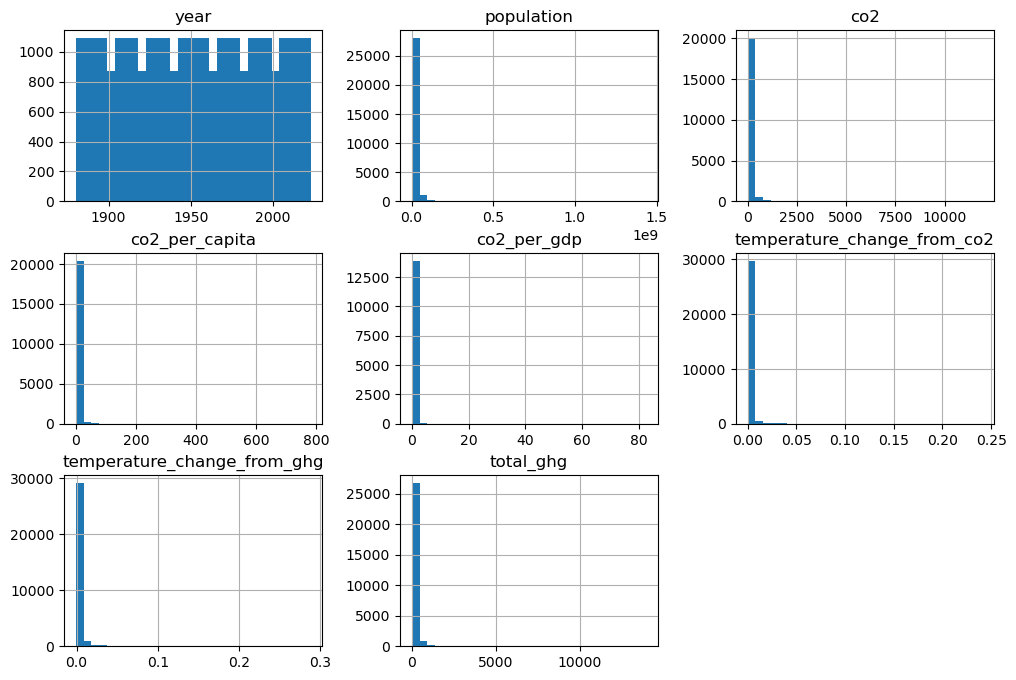

In [21]:
df_filtered.hist(figsize=(12, 8), bins=30)
plt.show()

In [23]:
# Using Interpolation to fill misssing values
cols_to_interpolate = ['population', 'co2', 'co2_per_capita', 'co2_per_gdp', 'total_ghg', 'temperature_change_from_co2', 'temperature_change_from_ghg']

df_filtered[cols_to_interpolate] = df_filtered.groupby('country')[cols_to_interpolate].transform(
    lambda x: x.interpolate(method='linear', limit_direction='both')
)

In [25]:
df_filtered.isnull().sum()

year                              0
country                           0
population                      288
co2                             432
co2_per_capita                  720
co2_per_gdp                    7776
temperature_change_from_co2     432
temperature_change_from_ghg     432
total_ghg                      3168
dtype: int64

In [29]:
df_filtered[df_filtered.population.isnull()]

,year,country,population,co2,co2_per_capita,co2_per_gdp,temperature_change_from_co2,temperature_change_from_ghg,total_ghg
864,1880,Antarctica,NaN,0.004,NaN,NaN,0.0,0.0,NaN
865,1881,Antarctica,NaN,0.004,NaN,NaN,0.0,0.0,NaN
866,1882,Antarctica,NaN,0.004,NaN,NaN,0.0,0.0,NaN
867,1883,Antarctica,NaN,0.004,NaN,NaN,0.0,0.0,NaN
868,1884,Antarctica,NaN,0.004,NaN,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
6187,2019,Christmas Island,NaN,0.000,NaN,NaN,0.0,0.0,NaN
6188,2020,Christmas Island,NaN,0.000,NaN,NaN,0.0,0.0,NaN
6189,2021,Christmas Island,NaN,0.000,NaN,NaN,0.0,0.0,NaN
6190,2022,Christmas Island,NaN,0.000,NaN,NaN,0.0,0.0,NaN


In [31]:
# Correlation Analysis
correlation_cols = ["co2", "co2_per_capita", "co2_per_gdp", "temperature_change_from_co2", "temperature_change_from_ghg", "total_ghg","population"]

In [49]:
# Compute correlation matrix
correlation_matrix = df_filtered.dropna()
correlation_matrix = correlation_matrix[correlation_cols].corr()

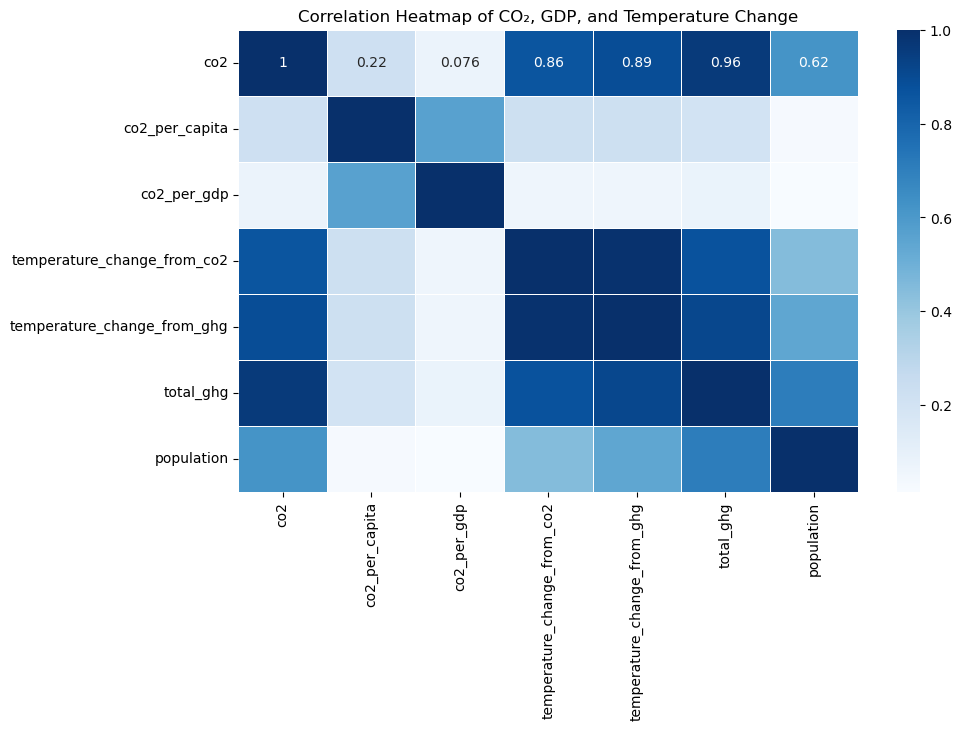

In [77]:
# Display correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", linewidths=0.5)
plt.title("Correlation Heatmap of CO₂, GDP, and Temperature Change")
plt.show()